In [120]:
# Importing Data Science Libraries
import pandas as pd
import os, glob
import numpy as np
import datetime as dt

# Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set.option('max_column')

In [8]:
### Merging 12 months of data in a single file
df = pd.read_csv(r"C:\Users\frank\Desktop\Shakes\Fitabase_Data\dailyActivity_merged.csv")

files = [file for file in os.listdir(r"C:\Users\frank\Desktop\Shakes\Fitabase_Data")]

for file in files:
    print(file)
    


dailyActivity_merged.csv
dailyCalories_merged.csv
dailyIntensities_merged.csv
dailySteps_merged.csv
heartrate_seconds_merged.csv
hourlyCalories_merged.csv
hourlyIntensities_merged.csv
hourlySteps_merged.csv
minuteCaloriesNarrow_merged.csv
minuteCaloriesWide_merged.csv
minuteIntensitiesNarrow_merged.csv
minuteIntensitiesWide_merged.csv
minuteMETsNarrow_merged.csv
minuteSleep_merged.csv
minuteStepsNarrow_merged.csv
minuteStepsWide_merged.csv
sleepDay_merged.csv
weightLogInfo_merged.csv


In [12]:
#Prepare the data
df = pd.read_csv(r"C:\Users\frank\Desktop\Shakes\Fitabase_Data\dailyActivity_merged.csv")

In [17]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [19]:
df.tail(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
930,8877689391,5/3/2016,10818,8.210000,8.210000,0.0,1.39,0.10,6.67,0.01,19,3,229,1189,2817
931,8877689391,5/4/2016,18193,16.299999,16.299999,0.0,10.42,0.31,5.53,0.00,66,8,212,1154,3477
932,8877689391,5/5/2016,14055,10.670000,10.670000,0.0,5.46,0.82,4.37,0.00,67,15,188,1170,3052
933,8877689391,5/6/2016,21727,19.340000,19.340000,0.0,12.79,0.29,6.16,0.00,96,17,232,1095,4015
934,8877689391,5/7/2016,12332,8.130000,8.130000,0.0,0.08,0.96,6.99,0.00,105,28,271,1036,4142
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


In [27]:
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [26]:
#clean the data

df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')

In [30]:
# check the values between Total Distance and Tracker Distance
df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']

df['distance_diff'].value_counts()

0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: distance_diff, dtype: int64

In [38]:
df.query('distance_diff > 0.0').head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [41]:
#check column names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [48]:
#change columns name with hypen _
df.rename(columns = {'activitydate' : 'activity_date', 'totalsteps' : 'total_steps', 'totaldistance' : 'total_distance', 'trackerdistance': 'track_distance',
       'loggedactivitiesdistance' : 'logged_activities_distance', 'veryactivedistance' : 'very_active_distance',
       'moderatelyactivedistance': 'moderately_actived_distance', 'lightactivedistance' : 'light_active_distance',
       'sedentaryactivedistance': 'sedentary_active_distance', 'veryactiveminutes': 'very_active_minutes', 'fairlyactiveminutes' : 'fairly_active_minutes',
       'lightlyactiveminutes' : 'lightly_active_minutes', 'sedentaryminutes': 'sedentary_minutes',
       }, inplace=True)
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'track_distance', 'logged_activities_distance', 'very_active_distance',
       'moderately_actived_distance', 'light_active_distance',
       'sedentary_active_distance', 'very_active_minutes',
       'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes',
       'calories', 'distance_diff'],
      dtype='object')

In [83]:
# create columns
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week

df['n_day_of_week'] = df['activity_date'].dt.weekday # 0 as monday and 6 as Sunday

In [84]:
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'day_of_week', 'n_day_of_week'],
      dtype='object')

In [85]:
#checking.null.values
df.isna().sum()
#df.isnull().sum()

id                        0
activity_date             0
total_steps               0
total_distance            0
very_active_minutes       0
fairly_active_minutes     0
lightly_active_minutes    0
sedentary_minutes         0
calories                  0
day_of_week               0
n_day_of_week             0
dtype: int64

In [86]:
#check for duplicates
df.duplicated().sum()

0

In [87]:
#subset the data (these are columns you only want to use)
df = df[['id', 'activity_date', 'total_steps', 'total_distance', 
        'very_active_minutes','fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes',
       'calories','day_of_week', 'n_day_of_week']].copy()

In [88]:
df.head(4)

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Thursday,3
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Friday,4


In [126]:
# analysis
#sedentary: less than 6000 on average
#active: between 6000 and 12000 on average
#very active: more than 12000 on average

#df['id'].unique()
#df['activity_date'].value_counts()

id_grp = df.groupby(['id'])
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)
id_avg_step = id_avg_step.to_frame()

conditions = [
        (id_avg_step <= 6000),
        (id_avg_step > 6000) & (id_avg_step < 12000),
        (id_avg_step >= 12000)
]
values = ['sedentary','active','very_active']

id_avg_step['activity_level'] = np.select(conditions,values)

id_activity_level = id_avg_step['activity_level']

df['activity_level'] = [id_activity_level[c] for c in df['id']]



In [75]:
#df['activity_date'].nunique()

31

In [125]:
df.describe()

,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n_day_of_week
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
std,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000


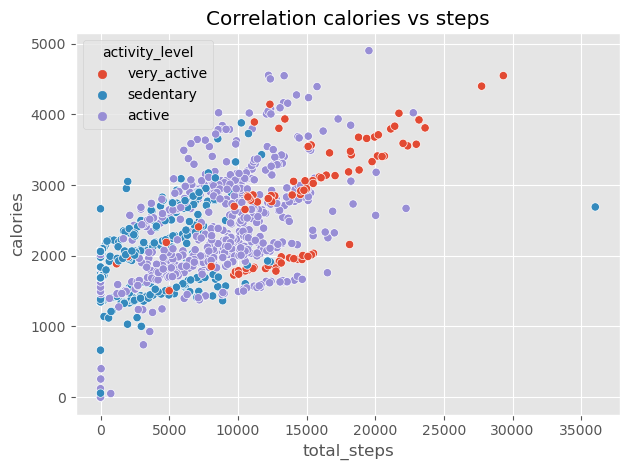

In [79]:
#Share
#correlation between steps and calories burned

ax = sns.scatterplot(x='total_steps', y='calories', data=df, hue=df['activity_level'])

plt.title('Correlation calories vs steps')

plt.tight_layout()
plt.show()

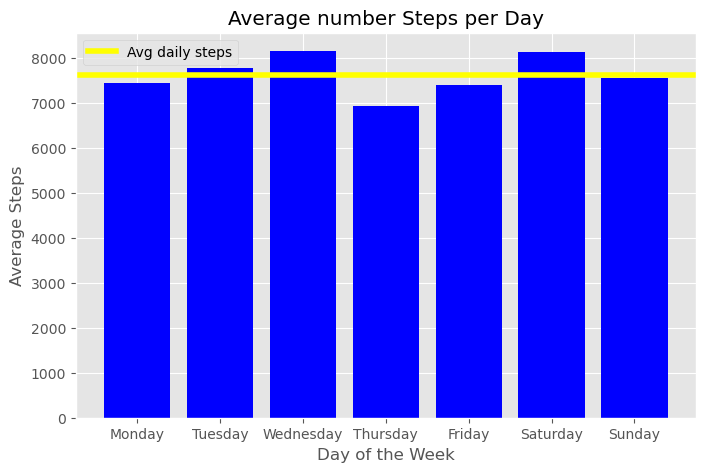

In [109]:
# average steps per day
fig, ax = plt.subplots(1,1,figsize=(8,5))
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_grp = df.groupby(['day_of_week'])
avg_daily_steps = day_grp['total_steps'].mean()

avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index, avg_daily_steps, color='blue')

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(), color='yellow', linewidth = '4', label='Avg daily steps')


# Adding labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Steps')
ax.set_title('Average number Steps per Day')
plt.legend()
plt.show()

Text(0.5, 1.0, '% of activity level in minutes')

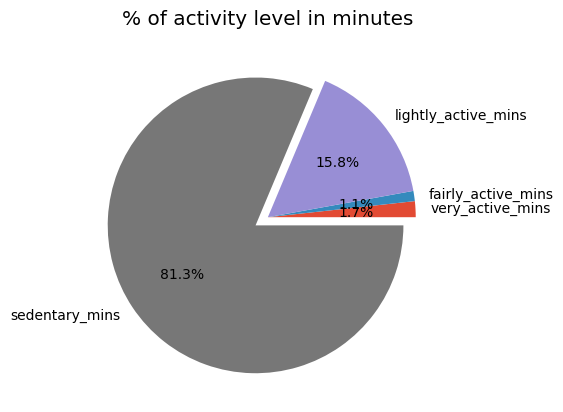

In [124]:
# percentage of activity in minutes

very_active_mins = df['very_active_minutes'].sum()
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins, fairly_active_mins,lightly_active_mins,sedentary_mins]

labels = ['very_active_mins', 'fairly_active_mins', 'lightly_active_mins', 'sedentary_mins']

explode = [0,0,0,0.1]

plt.pie(slices, labels=labels, explode = explode, autopct = '%1.1f%%')

plt.title('% of activity level in minutes')

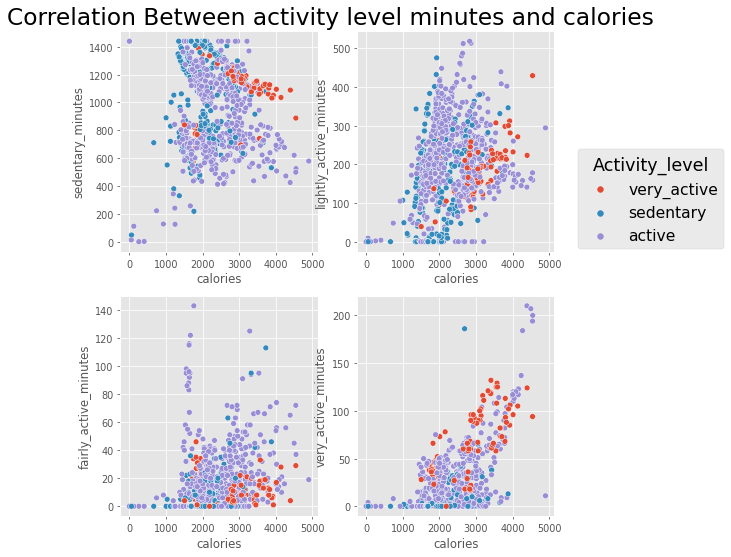

In [138]:
# correlation between activity level in minutes and calories

n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,9), dpi=70)

sns.scatterplot(data=df, x='calories', y='sedentary_minutes',hue='activity_level', ax=axes[0,0],legend=False)
sns.scatterplot(data=df, x='calories', y='lightly_active_minutes',hue='activity_level', ax=axes[0,1],legend=False)
sns.scatterplot(data=df, x='calories', y='fairly_active_minutes',hue='activity_level', ax=axes[1,0],legend=False)
sns.scatterplot(data=df, x='calories', y='very_active_minutes',hue='activity_level', ax=axes[1,1],legend=True)

plt.legend(title ='Activity_level', fontsize=16, title_fontsize=18, bbox_to_anchor = (1.9,1.7))

fig.suptitle('Correlation Between activity level minutes and calories', x=0.5,y=0.92, fontsize=24)

plt.show()

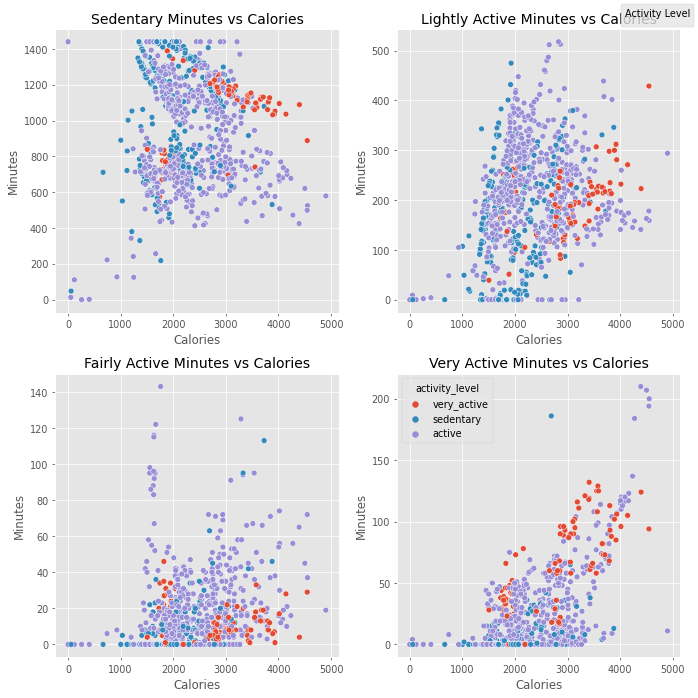

In [137]:
# Assuming 'df' is your DataFrame and it has the necessary columns
n_day_of_week = [0, 1, 2, 3, 4, 5, 6]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=70)

sns.scatterplot(data=df, x='calories', y='sedentary_minutes', hue='activity_level', ax=axes[0, 0], legend=False)
sns.scatterplot(data=df, x='calories', y='lightly_active_minutes', hue='activity_level', ax=axes[0, 1], legend=False)
sns.scatterplot(data=df, x='calories', y='fairly_active_minutes', hue='activity_level', ax=axes[1, 0], legend=False)
sns.scatterplot(data=df, x='calories', y='very_active_minutes', hue='activity_level', ax=axes[1, 1], legend=True)

# Adding a single legend for all subplots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title='Activity Level', loc='upper right')

# Adding titles and labels
axes[0, 0].set_title('Sedentary Minutes vs Calories')
axes[0, 1].set_title('Lightly Active Minutes vs Calories')
axes[1, 0].set_title('Fairly Active Minutes vs Calories')
axes[1, 1].set_title('Very Active Minutes vs Calories')

for ax in axes.flat:
    ax.set_xlabel('Calories')
    ax.set_ylabel('Minutes')

plt.tight_layout()
plt.show()


In [148]:
df.head(10)

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week,n_day_of_week,activity_level
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Tuesday,1,very_active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Wednesday,2,very_active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Thursday,3,very_active
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Friday,4,very_active
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,Saturday,5,very_active
5,1503960366,2016-04-17,9705,6.48,38,20,164,539,1728,Sunday,6,very_active
6,1503960366,2016-04-18,13019,8.59,42,16,233,1149,1921,Monday,0,very_active
7,1503960366,2016-04-19,15506,9.88,50,31,264,775,2035,Tuesday,1,very_active
8,1503960366,2016-04-20,10544,6.68,28,12,205,818,1786,Wednesday,2,very_active
9,1503960366,2016-04-21,9819,6.34,19,8,211,838,1775,Thursday,3,very_active
